In [1]:
#Solution of Assignment_4
#Instructor: Gopal Hazra
#Computational Physics-PHY617, Dept of Physics, IIT Kanpur

import numpy as np
import matplotlib.pyplot as plt

<font size="5">Question_1: Binary search method</font>

In [2]:
#### Calculating roots using binary search with stopping condition as tolerance
def bisect_method(g, x_start, x_end, tol):
    n_iter = 0
    g1 = g(x_start)
    if g1 == 0.0:
        return x_start, n_iter
    g2 = g(x_end)
    if g2 == 0.0:
        return x_end, n_iter

    if (g1*g2>0):
        print("error: g(x) does not change sign in [%s, %s]"%(x_start,x_end))
        print("so, root does not lie b/w [%s, %s]"%(x_start,x_end))
        print("root finding failed")
        return None, None

    while (x_end - x_start)/2.0 > tol:
        m = (x_start + x_end)/2.0
        gm = g(m)
        if (g1*gm<0):
            x_end = m
        else:
            x_start = m
        
        n_iter = n_iter + 1

    return (x_start + x_end)/2.0, n_iter

<font size="5">Newton-Raphson method</font>

In [3]:
#### Calculating roots using newton-raphson method with stopping condition as tolerance
def newton_raphson(g, dg, x_guess, tol):
    n_iter = 0
    while abs(g(x_guess))>tol:
        x_guess = x_guess - g(x_guess)/dg(x_guess)
        n_iter = n_iter + 1
    
    return x_guess, g(x_guess), n_iter

<font size="5">Question 1</font>

$$I(\lambda) = \frac{2 \pi h c^2 \lambda^{-5}}{e^{hc / \lambda k_B T} - 1}$$

Part (1.1a)


The emitted radiation will be strongest at the extremum of $I(\lambda)$, $\,\,$  i.e., at $\,\,$ $\frac{dI(\lambda)}{d\lambda}=0$.
$$\frac{dI(\lambda)}{d\lambda} = \frac{ -\frac{10 \pi h c^2}{\lambda^{6}} (e^{hc / \lambda k_B T} - 1) + \frac{2\pi h c^2}{\lambda^5} e^{hc / \lambda k_B T} \frac{hc}{{\lambda}^2 k_B T}  }{(e^{hc / \lambda k_B T} - 1)^2} = 0$$

$$ \implies  -5 (e^{hc / \lambda k_B T} - 1) + \frac{hc}{\lambda k_B T} e^{hc / \lambda k_B T}  = 0$$

$$ \implies -5(1 - e^{-hc / \lambda k_B T}) + \frac{hc}{\lambda k_B T} = 0 $$

$$ \implies 5 e^{-hc / \lambda k_B T} +  \frac{hc}{\lambda k_B T} - 5 = 0$$

Part (1.1b)

Substituting $\,\, x = hc / \lambda k_B T \,\, $ in above equation implies  $\,\,$ $5 e^{-x} + x - 5 = 0$

Now onwards, since $$x = hc / \lambda k_B T $$
$$\implies \lambda T = \frac{hc}{k_B x}$$
$$ \implies \lambda T = b $$
$$ \implies \lambda = \frac{b}{T} $$
$$\text{where} \,\,\, b = \frac{hc}{k_B x}$$

Trivial zero : 0.000001
No. of iterations : 20

Non-trivial zero : 4.965114
No. of iterations : 20
Wien's displacement constant : 0.002901


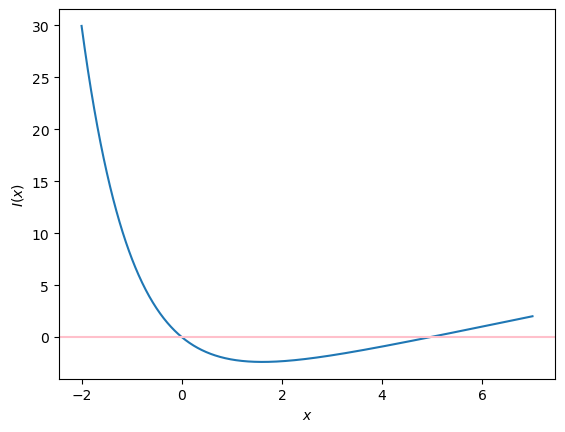

In [4]:
#### Part(1.2)

def I(x):
    return 5*np.exp(-x) + x - 5

x = np.linspace(-2,7,1000)
plt.plot(x,I(x))
plt.xlabel(r'$x$')
plt.ylabel(r'$I(x)$')
plt.axhline(y = 0.0, color='pink', linestyle = '-')

I_tol = 1e-6

### 1st root
I_sol, I_n = bisect_method(I,-1.0,1.0,I_tol)

print(f"Trivial zero : {I_sol:0.6f}")
print(f"No. of iterations : {I_n}\n")

### 2nd root
I_sol, I_n = bisect_method(I,4.0,6.0,I_tol)
print(f"Non-trivial zero : {I_sol:0.6f}")
print(f"No. of iterations : {I_n}")

x_sol = I_sol
#### Finding value of Wien's displacement constant, b
h = 6.626*10**(-34)
c = 3*1e8
k = 1.38*1e-23
b = h*c/(k*x_sol)

print(f"Wien's displacement constant : {b:0.6f}")

In [5]:
#### Part (1.3)
lmbd = 502*10**(-9) ## wavelength in meter

def temp(wv_length):
    return int(b/wv_length)

sun_temp = temp(lmbd)
print(f"Sun's temp : {sun_temp:d} K")

Sun's temp : 5779 K


<font size="5">Question 2</font>


$$ P(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1 $$

$$ \implies \frac{dP(x)}{dx} = 5444 x^5 - 13860 x^4 + 12600 x^3 - 5040 x^2 + 840 x - 42 $$


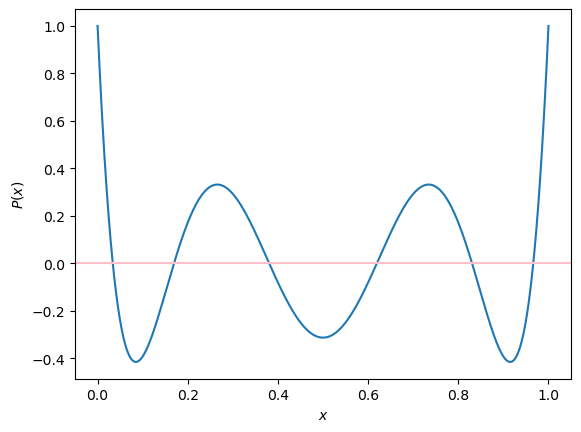

In [6]:
#### Part (2.a)
def poly(x):
    return 924.0*x**6 - 2772.0*x**5 + 3150.0*x**4 - 1680.0*x**3 + 420.0*x**2 - 42.0*x + 1.0

x = np.linspace(0.0,1.0,1000)

plt.plot(x,poly(x))
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')
plt.axhline(y=0.0, color = 'pink', linestyle = '-')

In [7]:
#### By looking at the above figure approximate roots are:
x_root = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 0.9])
print(f"Approximate roots are : {x_root}")

Approximate roots are : [0.  0.2 0.4 0.6 0.8 0.9]


In [8]:
#### Part (2.b)

def dpoly(x):
    return 924.0*6*x**5 - 2772.0*5*x**4 + 3150.0*4*x**3 - 1680.0*3*x**2 + 420.0*2*x - 42.0

f_tol = 1e-10
for i in range(len(x_root)):
    xroot, px, niter = newton_raphson(poly, dpoly, x_root[i], f_tol)
    print(f"At {i:d}-th root = {xroot:.9f},  P(x) = {px:.9f}, and no. of iterations = {niter}")

At 0-th root = 0.033765243,  P(x) = 0.000000000, and no. of iterations = 5
At 1-th root = 0.169395307,  P(x) = 0.000000000, and no. of iterations = 4
At 2-th root = 0.380690407,  P(x) = 0.000000000, and no. of iterations = 3
At 3-th root = 0.619309593,  P(x) = 0.000000000, and no. of iterations = 3
At 4-th root = 0.830604693,  P(x) = 0.000000000, and no. of iterations = 4
At 5-th root = 0.966234757,  P(x) = -0.000000000, and no. of iterations = 11


<font size="5">Question 3</font>

$$f(x) =x^2 - 4x + e^{-x} $$
$$\implies \frac{df(x)}{dx} = 2x - e^{-x} - 4$$

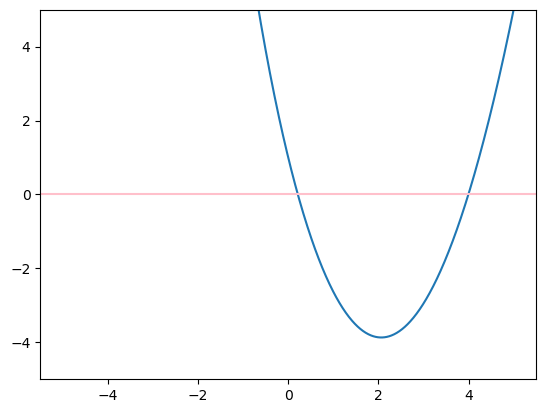

In [9]:
#### Part (3.a)

def f(x):
    return x**2 - 4*x + np.exp(-x)

x = np.linspace(-5,5,1000)
plt.plot(x,f(x))
plt.ylim(-5,5)
plt.axhline(y = 0.0, color = 'pink', linestyle = '-')

In [10]:
tol = 1e-7

##### Finding roots using Bisection method

### 1st root lies in (0.0,1.0)
root1, iter1 = bisect_method(f, 0.0, 1.0, tol)
print(f"1st root = {root1:0.6f} and iteration taken = {iter1}")


### 2nd root lies in (2.5,4.0)
root2, iter2 = bisect_method(f, 2.5, 4.0, tol)
print(f"2nd root = {root2:0.6f} and iteration taken = {iter2}")

1st root = 0.213348 and iteration taken = 23
2nd root = 3.995395 and iteration taken = 23


In [11]:
#### Part (3.b)

####### Finding roots using Newton-Raphson
def df(x):
    return 2*x - np.exp(-x) - 4

guess1 = 0.0
root1 , f_root1, iter1 = newton_raphson(f, df, guess1, tol)
print(f"1st root = {root1:0.6f}, f(x) = {f_root1:0.6f}, and iteration taken = {iter1}")

guess2 = 3.0
root2 , f_root2, iter2 = newton_raphson(f, df, guess2, tol)
print(f"2nd root = {root2:0.6f}, f(x) = {f_root2:0.6f}, and iteration taken = {iter2}")

1st root = 0.213348, f(x) = 0.000000, and iteration taken = 3
2nd root = 3.995395, f(x) = 0.000000, and iteration taken = 5


<font size="3">As we can see Newton-Raphson method took less number of iteration than Bisection method to calculate roots so, Newton Raphson method is more efficient.</font>

<font size="5">Question 4</font>

Refractive index

In [2]:
data = np.loadtxt("refractive_index.txt",skiprows=1)

def linear_interpolation(lmbd, x_array, y_array):
    refractive_index = y_array[0] + (lmbd - x_array[0])*(y_array[0] - y_array[1])/(x_array[0]-x_array[1])
    return refractive_index
    #### y = y[0] + (x - x[0])*(y[0] - y[1])/(x[0] - x[1])

wv_len = float(input("Enter a wavelength between 3,511 and 23,254: "))

for i in range(len(data[:,0])):
    if (wv_len == data[i,0]):
        ref_index = data[i,1]
        print(f"From the data, refractive index = {ref_index} at wavelength = {wv_len} \u00C5")
        break
    elif ( (data[i,0] < wv_len < data[i+1,0]) ):
        x_arr = np.array([data[i,0], data[i+1,0]])
        y_arr = np.array([data[i,1],data[i+1,1]])
        ref_index = linear_interpolation(wv_len, x_arr, y_arr)
        print(f"Interpolated refractive index = {ref_index:0.5f} at wavelength = {wv_len} \u00C5")
        break


Enter a wavelength between 3,511 and 23,254:  4000


Interpolated refractive index = 1.53096 at wavelength = 4000.0 Å
